In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [213]:
df = pd.read_hdf('data1.h5','df_sub')

In [3]:
def remove_duplicated(df):
    return_df = df.copy()
    is_duplicated = return_df.duplicated('moteid')
    return_df = return_df[~is_duplicated]
    return return_df
# remove_duplicated(df_epoch)

In [4]:
moteid_dict = {}

In [5]:
moteid_list = pd.unique(df['moteid'])

In [6]:
moteid_list

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 58])

In [7]:
for id in moteid_list:
    num = len(df[df['moteid'] == id])
    moteid_dict[id] = num

In [8]:
moteid_dict

{1: 43047,
 2: 46915,
 3: 46633,
 4: 43793,
 6: 35666,
 7: 55354,
 8: 15809,
 9: 45204,
 10: 47155,
 11: 41833,
 12: 19016,
 13: 27013,
 14: 26667,
 15: 2038,
 16: 32998,
 17: 33779,
 18: 33433,
 19: 39455,
 20: 28832,
 21: 58521,
 22: 60164,
 23: 62409,
 24: 57352,
 25: 53162,
 26: 61513,
 27: 37627,
 29: 64384,
 30: 38343,
 31: 65689,
 32: 43092,
 33: 35749,
 34: 48764,
 35: 51338,
 36: 56357,
 37: 47915,
 38: 49155,
 39: 32736,
 40: 46621,
 41: 40836,
 42: 44860,
 43: 38656,
 44: 47681,
 45: 53245,
 46: 52988,
 47: 56858,
 48: 58215,
 49: 34811,
 50: 15737,
 51: 42259,
 52: 34067,
 53: 25622,
 54: 28718,
 55: 2850,
 56: 2372,
 58: 4497}

In [9]:
moteid_dict_sorted = sorted(moteid_dict.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)
moteid_dict_sorted = np.array(moteid_dict_sorted)

In [10]:
moteid_dict_sorted

array([[   31, 65689],
       [   29, 64384],
       [   23, 62409],
       [   26, 61513],
       [   22, 60164],
       [   21, 58521],
       [   48, 58215],
       [   24, 57352],
       [   47, 56858],
       [   36, 56357],
       [    7, 55354],
       [   45, 53245],
       [   25, 53162],
       [   46, 52988],
       [   35, 51338],
       [   38, 49155],
       [   34, 48764],
       [   37, 47915],
       [   44, 47681],
       [   10, 47155],
       [    2, 46915],
       [    3, 46633],
       [   40, 46621],
       [    9, 45204],
       [   42, 44860],
       [    4, 43793],
       [   32, 43092],
       [    1, 43047],
       [   51, 42259],
       [   11, 41833],
       [   41, 40836],
       [   19, 39455],
       [   43, 38656],
       [   30, 38343],
       [   27, 37627],
       [   33, 35749],
       [    6, 35666],
       [   49, 34811],
       [   52, 34067],
       [   17, 33779],
       [   18, 33433],
       [   16, 32998],
       [   39, 32736],
       [   

In [11]:
moteid_list_new = moteid_dict_sorted[:20].T[0]
print(moteid_list_new)

[31 29 23 26 22 21 48 24 47 36  7 45 25 46 35 38 34 37 44 10]


In [216]:
epoch_id_list = sorted(pd.unique(df['epoch']))

In [220]:
moteid_list_new_sorted = sorted(moteid_list_new)
print(moteid_list_new_sorted)

[7, 10, 21, 22, 23, 24, 25, 26, 29, 31, 34, 35, 36, 37, 38, 44, 45, 46, 47, 48]


In [20]:
df_list = []
epoch_id_list_new = sorted(epoch_id_list)
for epoch in epoch_id_list_new:
    sub_df = df[df['epoch'] == epoch]
    sub_df = remove_duplicated(sub_df)
    df_list.append(sub_df)

In [21]:
len(df_list)

65536

In [228]:
diff_list = []
len_diff_list = []
for iter_df in df_list:
    id_list = iter_df['moteid'].values
    diff = np.setdiff1d(moteid_list_new_sorted,id_list)
    diff_list.append(diff)
    len_diff_list.append(len(diff))
diff_list = np.array(diff_list)
len_diff_list = np.array(len_diff_list)

In [231]:
len(np.where(len_diff_list == 0)[0])

2407

In [24]:
n3 = df_list[16763]['moteid'].values

In [25]:
n2 = df_list[16764]['moteid'].values

In [26]:
n1 = df_list[16762]['moteid'].values

In [27]:
np.setdiff1d(moteid_list_new_sorted,n3)

array([21, 22, 23, 26, 29, 34, 36, 44, 46])

In [28]:
np.setdiff1d(moteid_list_new_sorted,n2)

array([26, 29, 31, 34, 38, 45])

In [29]:
df_list[16764].datetime.mean()

Timestamp('2004-03-04 20:40:03.198323712')

In [30]:
timedelta = df_list[16766].datetime.mean() - df_list[16765].datetime.mean()
print(timedelta)

0 days 00:00:29.407543


In [31]:
timedelta.total_seconds()

29.407543936

In [32]:
# compute mean time delta between two epoch
mean_time_list = []
for df in df_list:
    mean_time_list.append(df['datetime'].mean())

In [33]:
(mean_time_list[1] - mean_time_list[0]).total_seconds()

36.3907008

In [34]:
diff_mean_time_array = np.zeros_like(mean_time_list)
for i in range(len(mean_time_list)-1):
    time_delta = mean_time_list[i+1] - mean_time_list[i]
    diff_mean_time_array[i] = time_delta.total_seconds()

In [35]:
diff_mean_time_array = diff_mean_time_array[:-1]
print(diff_mean_time_array)

[36.3907008 -567892.386082816 -510482.338053888 ... 29.669711104
 27.050535936 31.474818048]


In [272]:
# 统计前30000个frame
xxx_dict = {}
for id in moteid_list:
    xxx_dict[id] = 0

for sub_df in df_list:
    sub_df = remove_duplicated(sub_df)
    sub_id_list = sub_df['moteid'].values
    for idd in sub_id_list:
        xxx_dict[idd] += 1

In [273]:
xxx_dict

{1: 42111,
 2: 44847,
 3: 45260,
 4: 42540,
 6: 34679,
 7: 54488,
 8: 15792,
 9: 44687,
 10: 46379,
 11: 41410,
 12: 18924,
 13: 26857,
 14: 26493,
 15: 2038,
 16: 32998,
 17: 33723,
 18: 33407,
 19: 39016,
 20: 28832,
 21: 55620,
 22: 56037,
 23: 54525,
 24: 50431,
 25: 47357,
 26: 50440,
 27: 34848,
 29: 49546,
 30: 34073,
 31: 55195,
 32: 38718,
 33: 34446,
 34: 43629,
 35: 48957,
 36: 52766,
 37: 46654,
 38: 47955,
 39: 32045,
 40: 45361,
 41: 39999,
 42: 44374,
 43: 38018,
 44: 47037,
 45: 53174,
 46: 52654,
 47: 56224,
 48: 57407,
 49: 34660,
 50: 15737,
 51: 41970,
 52: 33810,
 53: 25470,
 54: 28508,
 55: 2842,
 56: 2372,
 58: 4497}

In [276]:
xxx_dict_sorted = sorted(xxx_dict.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)
xxx_dict_sorted = np.array(xxx_dict_sorted)
print(xxx_dict_sorted)

[[   48 57407]
 [   47 56224]
 [   22 56037]
 [   21 55620]
 [   31 55195]
 [   23 54525]
 [    7 54488]
 [   45 53174]
 [   36 52766]
 [   46 52654]
 [   26 50440]
 [   24 50431]
 [   29 49546]
 [   35 48957]
 [   38 47955]
 [   25 47357]
 [   44 47037]
 [   37 46654]
 [   10 46379]
 [   40 45361]
 [    3 45260]
 [    2 44847]
 [    9 44687]
 [   42 44374]
 [   34 43629]
 [    4 42540]
 [    1 42111]
 [   51 41970]
 [   11 41410]
 [   41 39999]
 [   19 39016]
 [   32 38718]
 [   43 38018]
 [   27 34848]
 [    6 34679]
 [   49 34660]
 [   33 34446]
 [   30 34073]
 [   52 33810]
 [   17 33723]
 [   18 33407]
 [   16 32998]
 [   39 32045]
 [   20 28832]
 [   54 28508]
 [   13 26857]
 [   14 26493]
 [   53 25470]
 [   12 18924]
 [    8 15792]
 [   50 15737]
 [   58  4497]
 [   55  2842]
 [   56  2372]
 [   15  2038]]


In [278]:
xxx_id_new = xxx_dict_sorted.T[0][:12]
print(sorted(xxx_id_new))

[7, 21, 22, 23, 24, 26, 31, 36, 45, 46, 47, 48]


In [293]:
xxx_id_new = [7, 21, 22, 23, 24, 31, 36, 45, 46, 47, 48]
print(len(xxx_id_new))

11


In [294]:
diff_list = []
len_diff_list = []
for sub_df in df_list:
    sub_df_id_list = sub_df['moteid'].values
    diff = np.setdiff1d(xxx_id_new, sub_df_id_list)
    diff_list.append(diff)
    len_diff_list.append(len(diff))
diff_list = np.array(diff_list)
len_diff_list = np.array(len_diff_list)

In [295]:
len(df_list)

65536

In [298]:
where_list = np.where(len_diff_list < 2)[0]
print(len(where_list))

31233


In [260]:
len_diff_list[where_list[0]]

1

In [261]:
diff_list[where_list[1]]

array([26])

In [299]:
where_dict = {}
for id in where_list:
    for item in diff_list[id]:
        if item in where_dict.keys():
            where_dict[item] += 1
        else:
            where_dict[item] = 1

In [288]:
sorted(where_dict.keys())

[7, 21, 22, 23, 24, 26, 31, 36, 45, 46, 47, 48]

In [300]:
where_dict

{31: 1732,
 36: 2119,
 23: 1530,
 47: 1115,
 24: 2374,
 21: 1229,
 7: 2056,
 48: 925,
 46: 2042,
 45: 1818,
 22: 1356}

In [ ]:
[7, 18, 20, 21, 22, 23, 26, 31, 45, 46, 47, 48]

In [301]:
# top 20 sensors for df in top 30000  
len(np.where(len_diff_list == 0 )[0])

12937

In [252]:
len(np.where(len_diff_list < 2 )[0])

8194

In [93]:
np.mean(diff_list)

1.4890333333333334

In [42]:
df_list[0]['moteid'].values

array([11, 12, 19, 21, 47, 52])

In [43]:
epoch_list = df['epoch'].unique()

In [44]:
np.max(epoch_list)

65535

In [45]:
zeros = np.zeros(65536)
zeros[epoch_list] = 1

In [46]:
zeros = np.zeros(65536)
for epoch in epoch_list:
    zeros[epoch] = len(df[df['epoch'] == epoch])

In [47]:
zeros = np.zeros(65536)
for i,sub_df in enumerate(df_list):
    zeros[i] = len(sub_df)

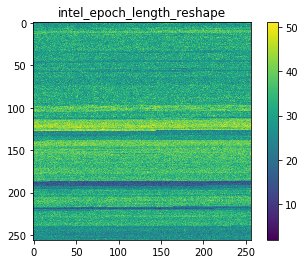

In [64]:
plt.imshow(zeros.reshape(256,256))
plt.colorbar()
plt.title('intel_epoch_length_reshape')
plt.savefig('intel_epoch_length.jpg',dpi=300)

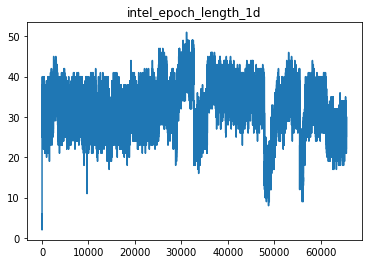

In [63]:
plt.plot(zeros)
plt.title('intel_epoch_length_1d')
plt.savefig('intel_epoch_length_2.jpg',dpi=300)

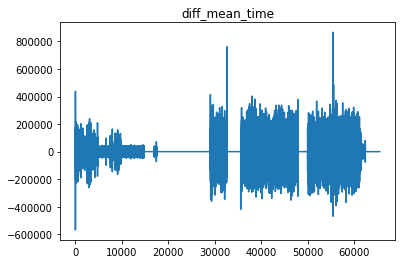

In [62]:
plt.title('diff_mean_time')
plt.plot(diff_mean_time_array)
plt.savefig('diff_mean_time_array.jpg',dpi=300)

In [51]:
zeros[1]

2.0

In [52]:
mean_time_list[16766]

Timestamp('2004-03-04 20:41:01.748307712')

In [53]:
mean_time_list[16765]

Timestamp('2004-03-04 20:40:32.340763776')

In [54]:
diff_mean_time_array[16765]

29.407543936

In [55]:
diff_mean_time_array.mean()

-0.0004919857044794342

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        7.0000e+00, 5.0000e+00, 1.1000e+01, 2.1000e+01, 2.6000e+01,
        3.5000e+01, 6.1000e+01, 8.3000e+01, 1.1800e+02, 1.6000e+02,
        2.1800e+02, 2.4300e+02, 3.4500e+02, 4.2800e+02, 5.4800e+02,
        6.9000e+02, 8.4900e+02, 1.0750e+03, 1.3900e+03, 1.4900e+03,
        1.4370e+03, 1.9380e+03, 4.0850e+03, 1.8590e+03, 3.0664e+04,
        2.0700e+03, 3.7670e+03, 2.3360e+03, 1.5200e+03, 1.4020e+03,
        1.4820e+03, 1.1080e+03, 8.8100e+02, 7.5100e+02, 6.1400e+02,
        4.4600e+02, 3.4800e+02, 2.5200e+02, 2.3200e+02, 1.7700e+02,
        1.0100e+02, 8.3000e+01, 5.2000e+01, 2.8000e+01, 2.4000e+01,
        2.0000e+01, 1.3000e+01, 1.0000e+01, 8.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

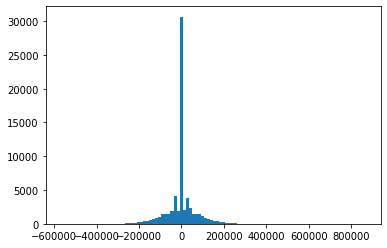

In [57]:
plt.hist(diff_mean_time_array,bins=100)

In [58]:
df_list[16766].datetime.mean()

Timestamp('2004-03-04 20:41:01.748307712')

In [59]:
len_diff_array = np.array(len_diff_list)

In [60]:
np.where(len_diff_array == 0)[0]

array([ 1730,  1903,  2003, ..., 61428, 62302, 64186])

# Try to combine locs

In [319]:
locs=[[15, 16],
 [11, 12, 13, 14],
 [8, 9, 10],
 [52, 53, 54],
 [49, 50, 51],
 [17, 18],
 [],
 [5, 6, 7],
 [],
 [48],
 [19, 20, 21],
 [],
 [3, 4],
 [],
 [45, 46, 47],
 [22, 23],
 [],
 [1, 2],
 [],
 [43, 44],
 [24, 25, 26],
 [27, 28, 29, 30, 31],
 [32, 33, 34, 35],
 [36, 37, 38, 39, 40],
 [41, 42]]

In [320]:
locs_dict = {}
for i,loc in enumerate(locs):
    if loc != []:
        for id in loc:
            locs_dict[id] = i

In [321]:
locs_dict

{15: 0,
 16: 0,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 8: 2,
 9: 2,
 10: 2,
 52: 3,
 53: 3,
 54: 3,
 49: 4,
 50: 4,
 51: 4,
 17: 5,
 18: 5,
 5: 7,
 6: 7,
 7: 7,
 48: 9,
 19: 10,
 20: 10,
 21: 10,
 3: 12,
 4: 12,
 45: 14,
 46: 14,
 47: 14,
 22: 15,
 23: 15,
 1: 17,
 2: 17,
 43: 19,
 44: 19,
 24: 20,
 25: 20,
 26: 20,
 27: 21,
 28: 21,
 29: 21,
 30: 21,
 31: 21,
 32: 22,
 33: 22,
 34: 22,
 35: 22,
 36: 23,
 37: 23,
 38: 23,
 39: 23,
 40: 23,
 41: 24,
 42: 24}

In [315]:
locs_zeros = np.zeros(25)

In [364]:
def detect_dataframe(df,locs_dict=locs_dict):
    locs_zeros = np.zeros(25)
    df_ids = df['moteid'].values
    for id in df_ids:
#         print(id)
        if id in locs_dict.keys():
            locs_zeros[locs_dict[id]] += 1
        
    return len(np.where(locs_zeros != 0)[0])
#     return locs_zeros
detect_dataframe(df_list[10000])

18

In [347]:
zz = np.zeros(len(df_list))
for i,ddf in enumerate(df_list):
#     print(i,'df')
    zz[i] = detect_dataframe(ddf)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.5000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 7.7000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3300e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.5400e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.8200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.2700e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.2900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.4100e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.9110e+03, 0.00

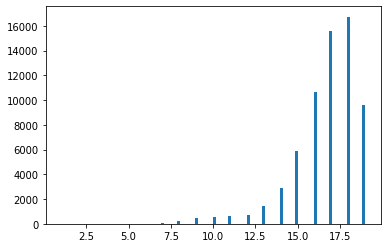

In [354]:
plt.hist(zz,bins=100)

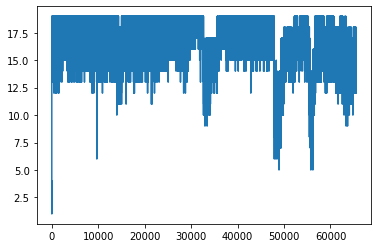

In [348]:
plt.plot(zz)

In [362]:
z_diff = np.arange(zz.min(),zz.max(),1)
for z in z_diff:
    print(int(z),len(np.where(zz == z)[0]))

1 1
2 0
3 0
4 1
5 4
6 15
7 77
8 233
9 454
10 582
11 627
12 729
13 1410
14 2911
15 5881
16 10687
17 15612
18 16738


## Compare dataframe with 17 and 18 nodes

In [391]:
def detect_dataframe(df,locs_dict=locs_dict):
    locs_zeros = np.zeros(25)
    df_ids = df['moteid'].values
    for id in df_ids:
#         print(id)
        if id in locs_dict.keys():
            locs_zeros[locs_dict[id]] = 1
        
#     return len(np.where(locs_zeros != 0)[0])
    return locs_zeros
detect_dataframe(df_list[10000])

array([1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1.])

In [378]:
rs = detect_dataframe(df_list[14000])
print(len(np.where(rs != 0)[0]))
print(rs)

13
[0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1.]


In [379]:
zeross = np.zeros(25)
for i,ddf in enumerate(df_list):
#     print(i,'df')
    zeross += detect_dataframe(ddf)

In [381]:
zeross.reshape(5,5)

array([[33955., 57484., 59416., 52745., 55718.],
       [46269.,     0., 59265.,     0., 57407.],
       [61713.,     0., 57472.,     0., 63217.],
       [63164.,     0., 57746.,     0., 56662.],
       [63762., 64164., 63527., 65121., 56147.]])

In [387]:
sorted(zeross[zeross != 0])

[33955.0,
 46269.0,
 52745.0,
 55718.0,
 56147.0,
 56662.0,
 57407.0,
 57472.0,
 57484.0,
 57746.0,
 59265.0,
 59416.0,
 61713.0,
 63164.0,
 63217.0,
 63527.0,
 63762.0,
 64164.0,
 65121.0]

In [388]:
locs=[[],
 [11, 12, 13, 14],
 [8, 9, 10],
 [52, 53, 54],
 [49, 50, 51],
 [],
 [],
 [5, 6, 7],
 [],
 [48],
 [19, 20, 21],
 [],
 [3, 4],
 [],
 [45, 46, 47],
 [22, 23],
 [],
 [1, 2],
 [],
 [43, 44],
 [24, 25, 26],
 [27, 28, 29, 30, 31],
 [32, 33, 34, 35],
 [36, 37, 38, 39, 40],
 [41, 42]]

In [395]:
locs_dict = {}
for i,loc in enumerate(locs):
    if loc != []:
        for id in loc:
            locs_dict[id] = i

In [396]:
def detect_dataframe(df,locs_dict=locs_dict):
    locs_zeros = np.zeros(25)
    df_ids = df['moteid'].values
    for id in df_ids:
#         print(id)
        if id in locs_dict.keys():
            locs_zeros[locs_dict[id]] = 1
        
#     return len(np.where(locs_zeros != 0)[0])
    return locs_zeros
detect_dataframe(df_list[10000])

array([0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1.])

In [397]:
zeross = np.zeros(25)
for i,ddf in enumerate(df_list):
#     print(i,'df')
    zeross += detect_dataframe(ddf,locs_dict)

In [398]:
zeross.reshape(5,5)

array([[    0., 57484., 59416., 52745., 55718.],
       [    0.,     0., 59265.,     0., 57407.],
       [61713.,     0., 57472.,     0., 63217.],
       [63164.,     0., 57746.,     0., 56662.],
       [63762., 64164., 63527., 65121., 56147.]])

In [419]:
zeross.reshape(5,5)

array([[0., 1., 1., 1., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [490]:
zeross = np.array([0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1.])

In [400]:
zeross[zeross != 0] = 1

In [496]:
df_zeros1 = df_zeros.copy()

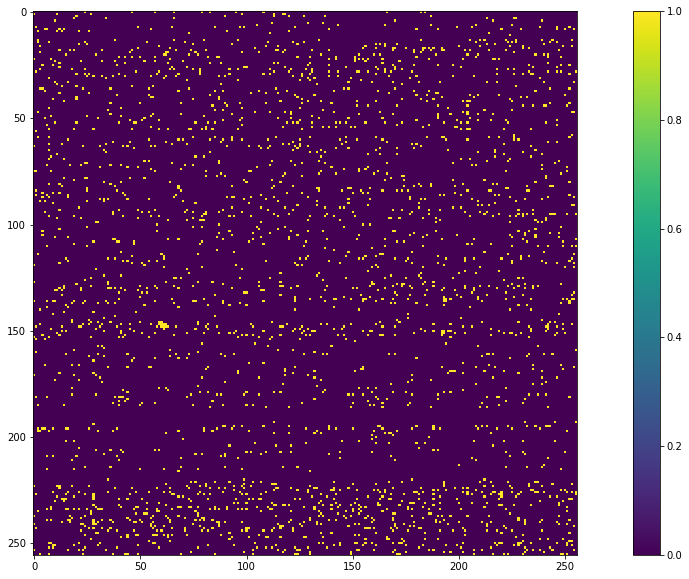

In [500]:
pp = (df_zeros1 - df_zeros)
plt.imshow(pp.reshape(256,256))
plt.colorbar()

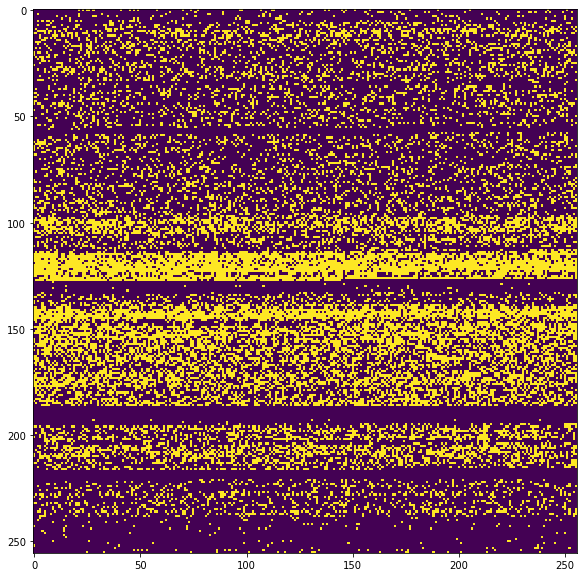

In [497]:
# Old
zeross = np.array([0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1.])
df_zeros = np.zeros(65536)
for i,ddf in enumerate(df_list):
#     print(i)
    if (detect_dataframe(ddf) == zeross).all():
        df_zeros[i] = 1
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(df_zeros.reshape(256,256))

In [505]:
np.sum(zeross)

15.0

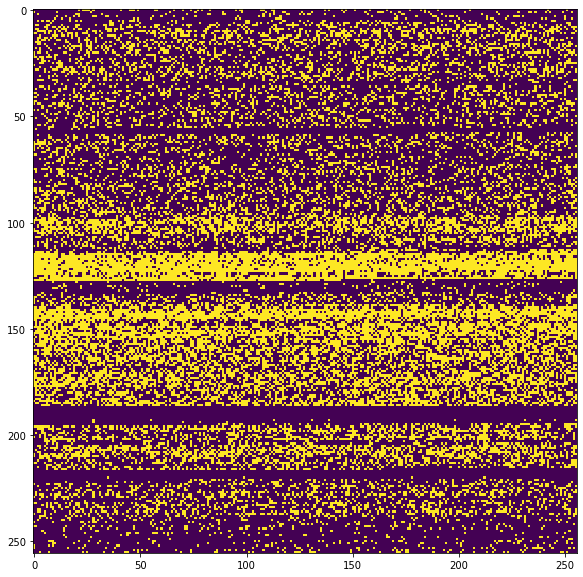

In [504]:
# New
zeross = np.array([0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1.])
df_zeros = np.zeros(65536)
for i,ddf in enumerate(df_list):
#     print(i)
    if -1 not in (detect_dataframe(ddf)-zeross):
        df_zeros[i] = 1
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(df_zeros.reshape(256,256))

In [584]:
# zeross = np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
#        1., 0., 1., 1., 1., 1., 1., 0.]) #12
# zeross = np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
#        1., 0., 1., 1., 1., 1., 1., 0.]) #11
zeross = np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 1., 1., 0.]) #10
df_zeros_list = []
zeross_index = np.where(zeross == 1)[0]
for z_index in zeross_index:
    zeross[z_index] = 0
    df_zeros = np.zeros(65536)
    for i,ddf in enumerate(df_list):
    #     print(i)
        if -1 not in (detect_dataframe(ddf)-zeross):
            df_zeros[i] = 1
    print(z_index,np.sum(df_zeros))
    df_zeros_list.append(df_zeros)
    zeross[z_index] = 1
            

2 44233.0
10 41653.0
12 45014.0
14 40903.0
15 41321.0
17 44890.0
20 41259.0
21 41275.0
22 41524.0
23 40689.0


In [585]:
for i,df_zeros in enumerate(df_zeros_list):
#     plt.figure()
#     plt.imshow(df_zeros.reshape(256,256))
    print(zeross_index[i],'---------')
    for i in np.arange(1,10,1):
        print(i,compute_temporal_length(df_zeros,i))

2 ---------
1 44233
2 33163
3 26042
4 21182
5 17704
6 15138
7 13195
8 11659
9 10430
10 ---------
1 41653
2 30314
3 23585
4 19175
5 16075
6 13743
7 11970
8 10563
9 9401
12 ---------
1 45014
2 34760
3 28082
4 23390
5 19904
6 17168
7 14998
8 13248
9 11792
14 ---------
1 40903
2 29274
3 22397
4 17874
5 14694
6 12347
7 10591
8 9218
9 8117
15 ---------
1 41321
2 29945
3 23150
4 18611
5 15391
6 13002
7 11197
8 9789
9 8651
17 ---------
1 44890
2 34266
3 27307
4 22340
5 18676
6 15882
7 13735
8 12027
9 10649
20 ---------
1 41259
2 29894
3 23112
4 18617
5 15441
6 13078
7 11289
8 9888
9 8753
21 ---------
1 41275
2 29821
3 22847
4 18224
5 14964
6 12544
7 10730
8 9314
9 8178
22 ---------
1 41524
2 30082
3 23103
4 18455
5 15155
6 12714
7 10863
8 9405
9 8252
23 ---------
1 40689
2 29117
3 22242
4 17729
5 14552
6 12211
7 10452
8 9076
9 7973


36430.0
1 36430
2 24213
3 17447
4 13242
5 10421
6 8436
7 6998
8 5915
9 5071


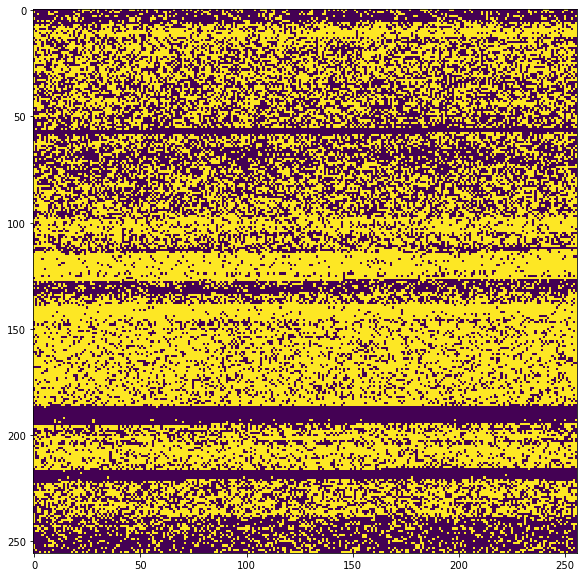

In [592]:
# after drop 3, 4, 24,9,19
# zeross = np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
#        1., 0., 1., 1., 1., 1., 1., 0.]) #11
zeross = np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 1., 1., 0.]) #10

df_zeros = np.zeros(65536)
for i,ddf in enumerate(df_list):
#     print(i)
    if -1 not in (detect_dataframe(ddf)-zeross):
        df_zeros[i] = 1.
print(np.sum(df_zeros))
for i in np.arange(1,10,1):
    print(i,compute_temporal_length(df_zeros,i))
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(df_zeros.reshape(256,256))

In [551]:
for i in np.arange(1,10,1):
    print(i,compute_temporal_length(df_zeros,i))

1 33169
2 20364
3 13702
4 9795
5 7331
6 5713
7 4572
8 3759
9 3148


In [538]:
np.sum(df_zeros)

22111.0

In [534]:
def compute_temporal_length(df_zeros,window=3):
    summ = 0
    index = np.where(df_zeros == 1)[0]
    length = len(df_zeros)
    for item_index in index:
        if item_index+window <= length:
            if 0 not in df_zeros[item_index:item_index+window]:
                summ += 1
    return summ
compute_temporal_length(df_zeros,5)

2868

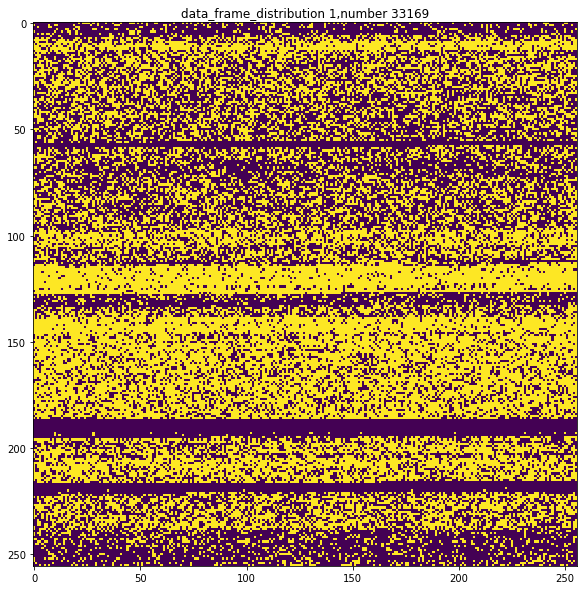

In [573]:
def compute_temporal_length1(df_zeros,window=3):
    summ = 0
    frame_list = np.zeros(65536)
    index = np.where(df_zeros == 1)[0]
    length = len(df_zeros)
    for item_index in index:
        if item_index+window <= length:
            if 0 not in df_zeros[item_index:item_index+window]:
                summ += 1
                frame_list[item_index] = 1
    return summ,frame_list
length = 2
fl = compute_temporal_length1(df_zeros,length)
plt.imshow(fl[1].reshape(256,256))
plt.title('data_frame_distribution {},number {}'.format(length,fl[0]))
# plt.savefig('data_frame_distribution_{}.png'.format(length))

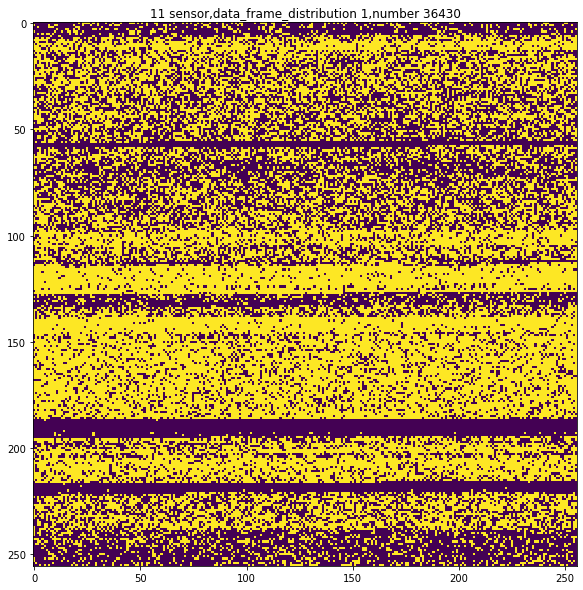

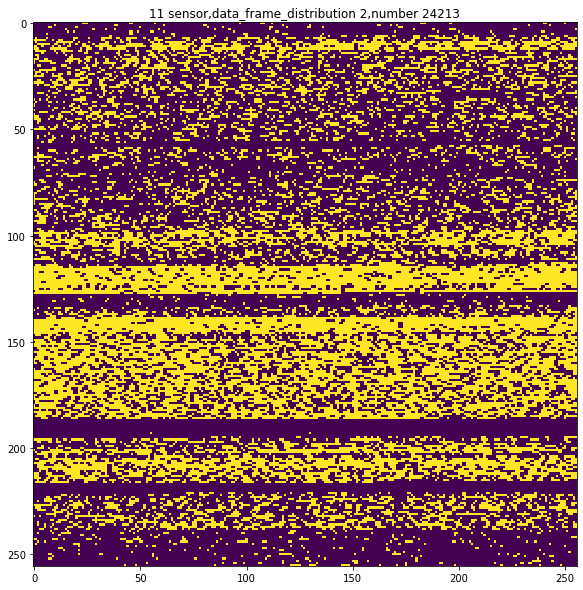

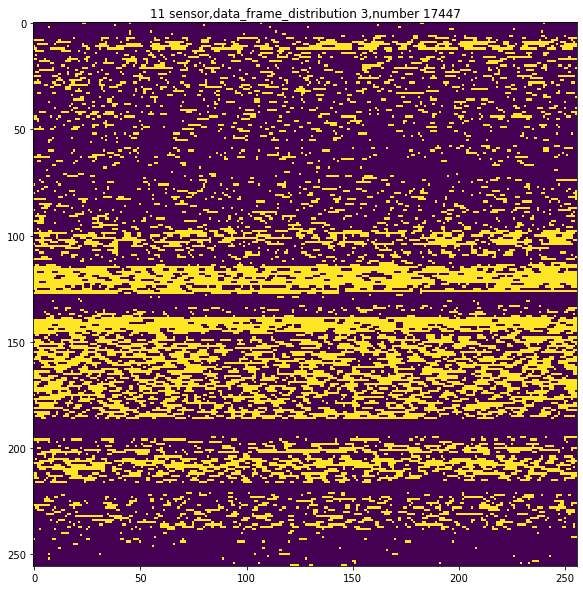

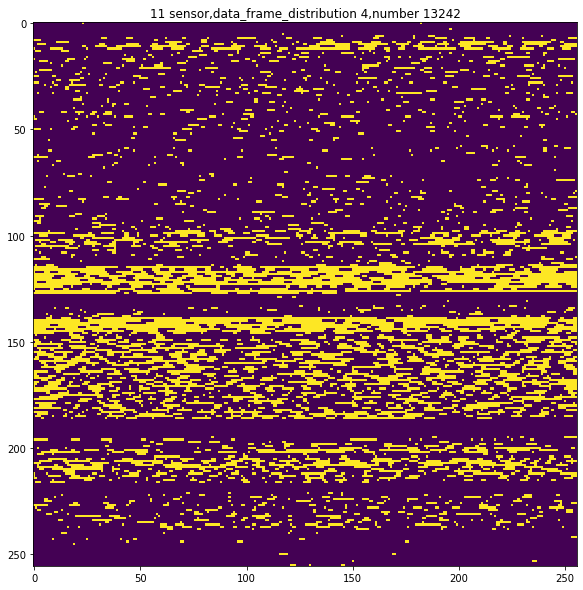

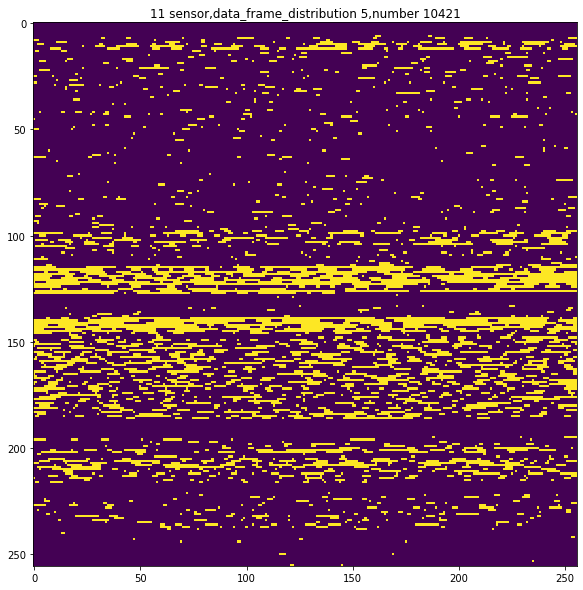

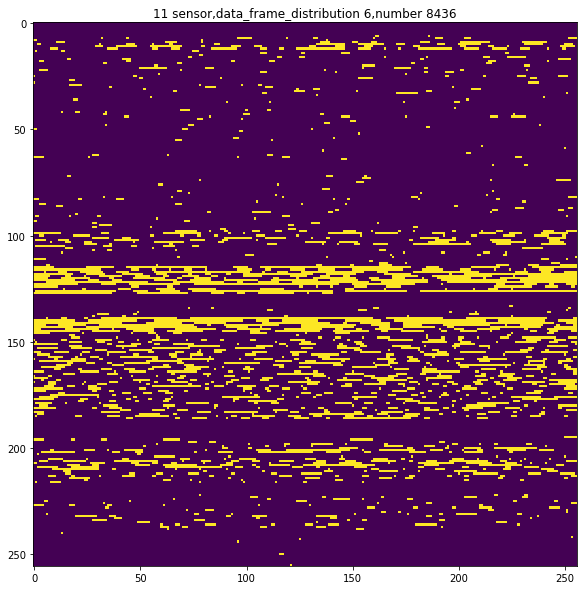

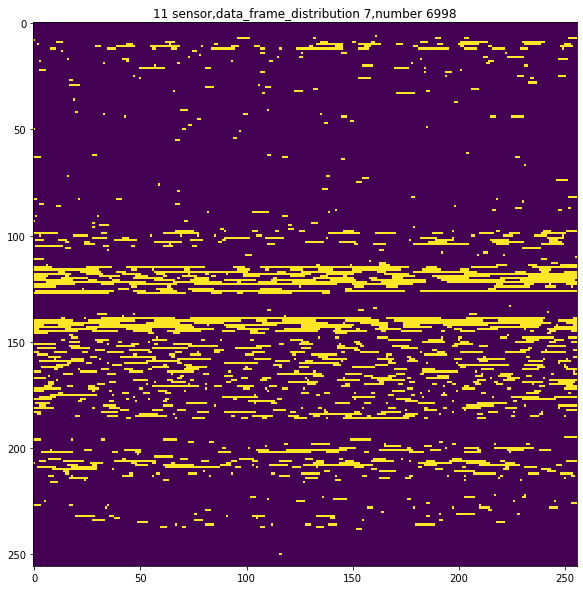

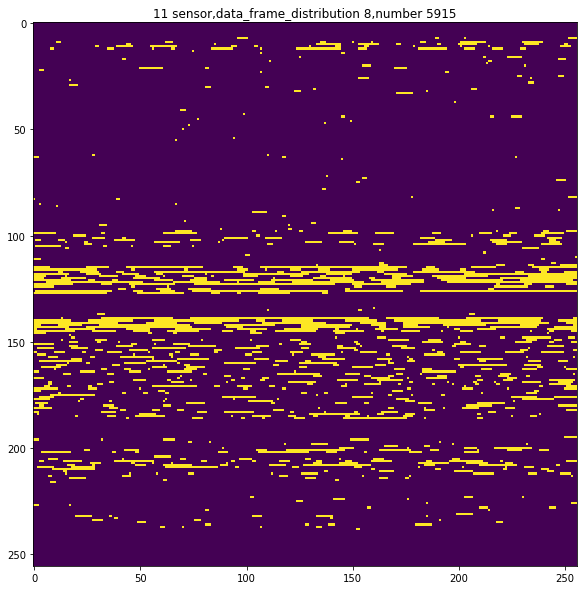

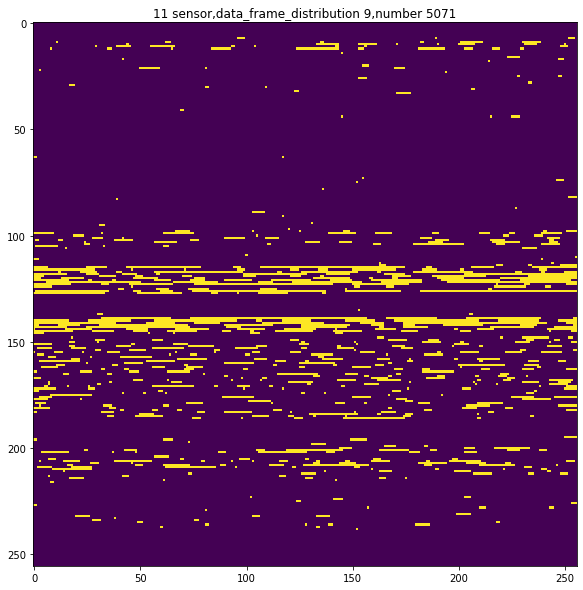

In [593]:
plt.rcParams["figure.figsize"] = (10,10)
for length in np.arange(1,10,1):
    fl = compute_temporal_length1(df_zeros,length)
    plt.figure()
    plt.imshow(fl[1].reshape(256,256))
    plt.title('{} sensor,data_frame_distribution {},number {}'.format(int(np.sum(zeross)),length,fl[0]))
    plt.savefig('{}_data_frame_distribution_{}.png'.format(int(np.sum(zeross)),length),dpi=300)

In [537]:
for i in np.arange(1,10,1):
    print(i,compute_temporal_length(df_zeros1,i))

1 22111
2 10531
3 6078
4 4013
5 2868
6 2193
7 1763
8 1468
9 1251


In [430]:
np.where(df_zeros != 1)[0]

array([    0,     1,     2, ..., 65533, 65534, 65535])

In [427]:
detect_dataframe(df_list[21]) == zeross

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [424]:
df_zeros[21]

1.0

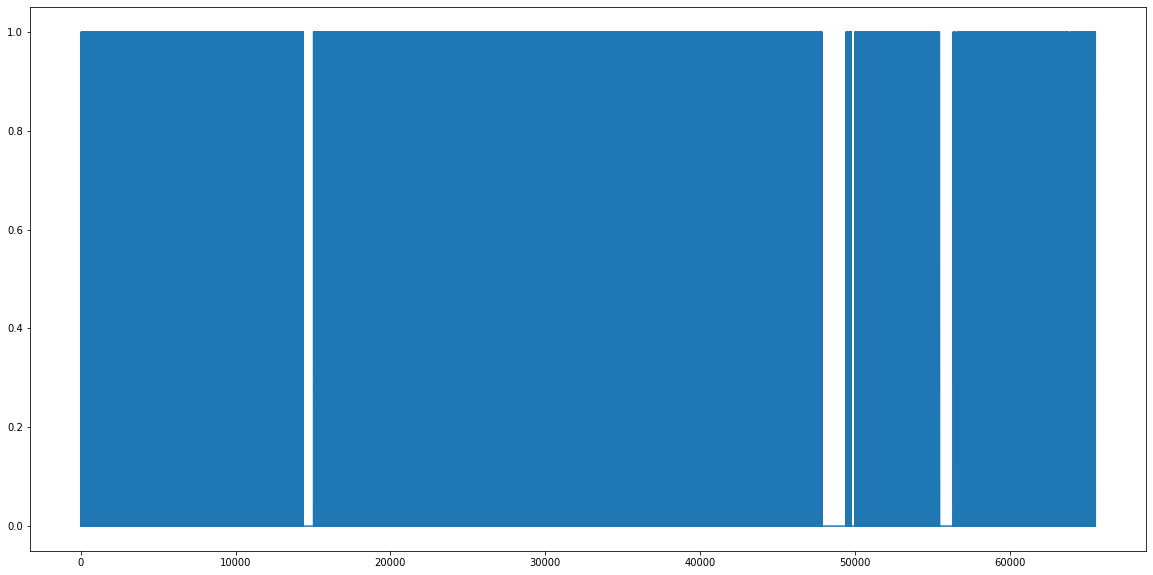

In [480]:
plt.plot(df_zeros)

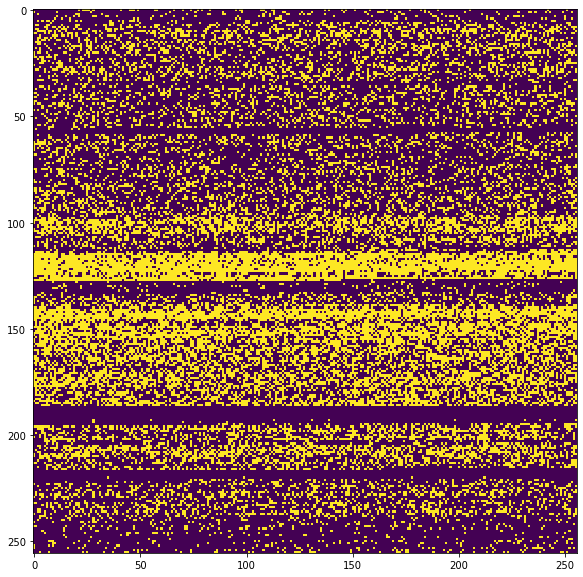

In [481]:
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(df_zeros.reshape(256,256))

In [443]:
zzc = zz.copy()

In [451]:
zzc

array([ 4.,  1., 18., ..., 14., 14., 15.])

In [455]:
zzc[zzc < 16]=0
zzc[zzc >= 16] = 1

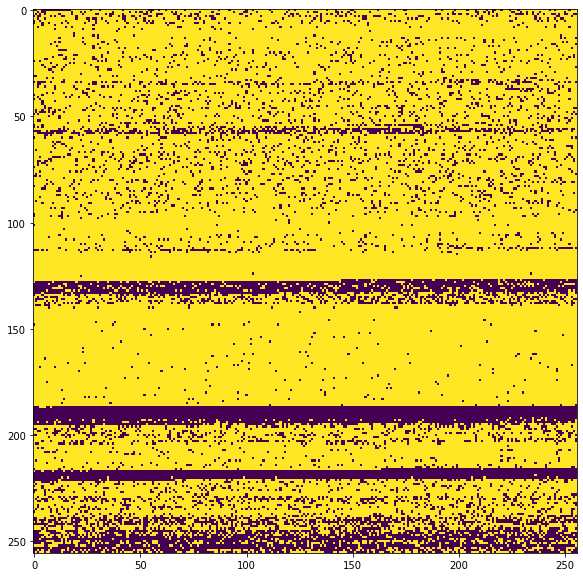

In [456]:
plt.imshow(zzc.reshape(256,256))

In [457]:
np.where(zzc ==1)[0]

array([    2,     3,    18, ..., 65529, 65531, 65532])

In [463]:
np.where(df_zeros ==1)[0]

array([   21,    23,    25, ..., 65481, 65493, 65518])

In [474]:
detect_dataframe(df_list[65529])-zeross

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [475]:
detect_dataframe(df_list[65531])-zeross

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [476]:
detect_dataframe(df_list[65493])-zeross

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [473]:
zeross = np.array([0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1.])

In [417]:
sum(df_zeros)

19464.0

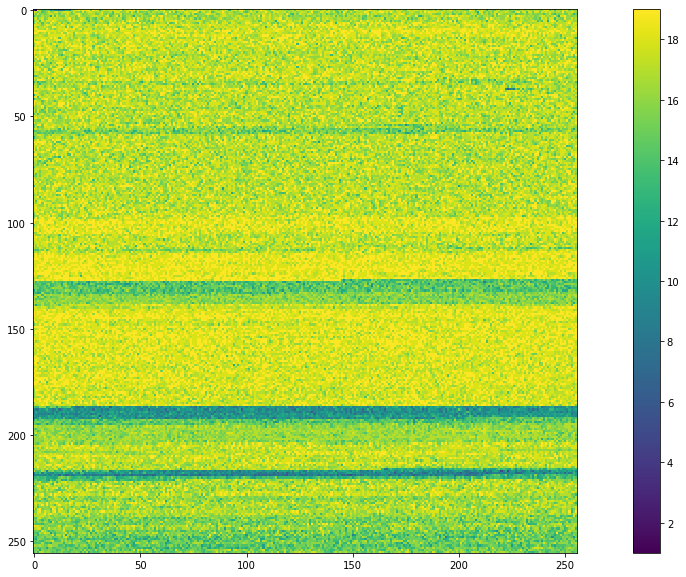

In [436]:
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(zz.reshape(256,256))
plt.colorbar()